In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Importing the Quarterly data from OECD on Danish GDP 1990-2023
gdp = pd.read_csv("Data/QGDP.csv", sep=';', header=None)
cons = pd.read_csv("Data/Consumer.csv", sep=';')
indu = pd.read_csv("Data/Industry.csv", sep=';') 

In [2]:
#For cons and indy, columns are renamed to more simple names

cons.columns = ['Date', 'COF', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']
indu.columns = ['Date', 'COF', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']

#Converting Date to datetime. The current format is 'DD-MM-YYYY'
cons['Date'] = pd.to_datetime(cons['Date'], format='%d-%m-%Y')
indu['Date'] = pd.to_datetime(indu['Date'], format='%d-%m-%Y')

# Removing question 6 in indu as it is not available in the full period
indu = indu.drop('Q6', axis=1)

# Creating new time series for COF for cons and indu
cons_cof = cons[['Date','COF']]
indu_cof = indu[['Date','COF']]

#Creating new time series for the questions in cons and indu
cons_q = cons.drop('COF', axis=1)
indu_q = indu.drop('COF', axis=1)

In [3]:
#Checking the datatypes of the data
print(cons.dtypes)
print(indu.dtypes)

Date    datetime64[ns]
COF            float64
Q1             float64
Q2             float64
Q3             float64
Q4             float64
Q5             float64
Q6             float64
Q7             float64
Q8             float64
Q9             float64
Q10            float64
Q11            float64
Q12            float64
dtype: object
Date    datetime64[ns]
COF              int64
Q1               int64
Q2               int64
Q3               int64
Q4               int64
Q5               int64
Q7               int64
dtype: object


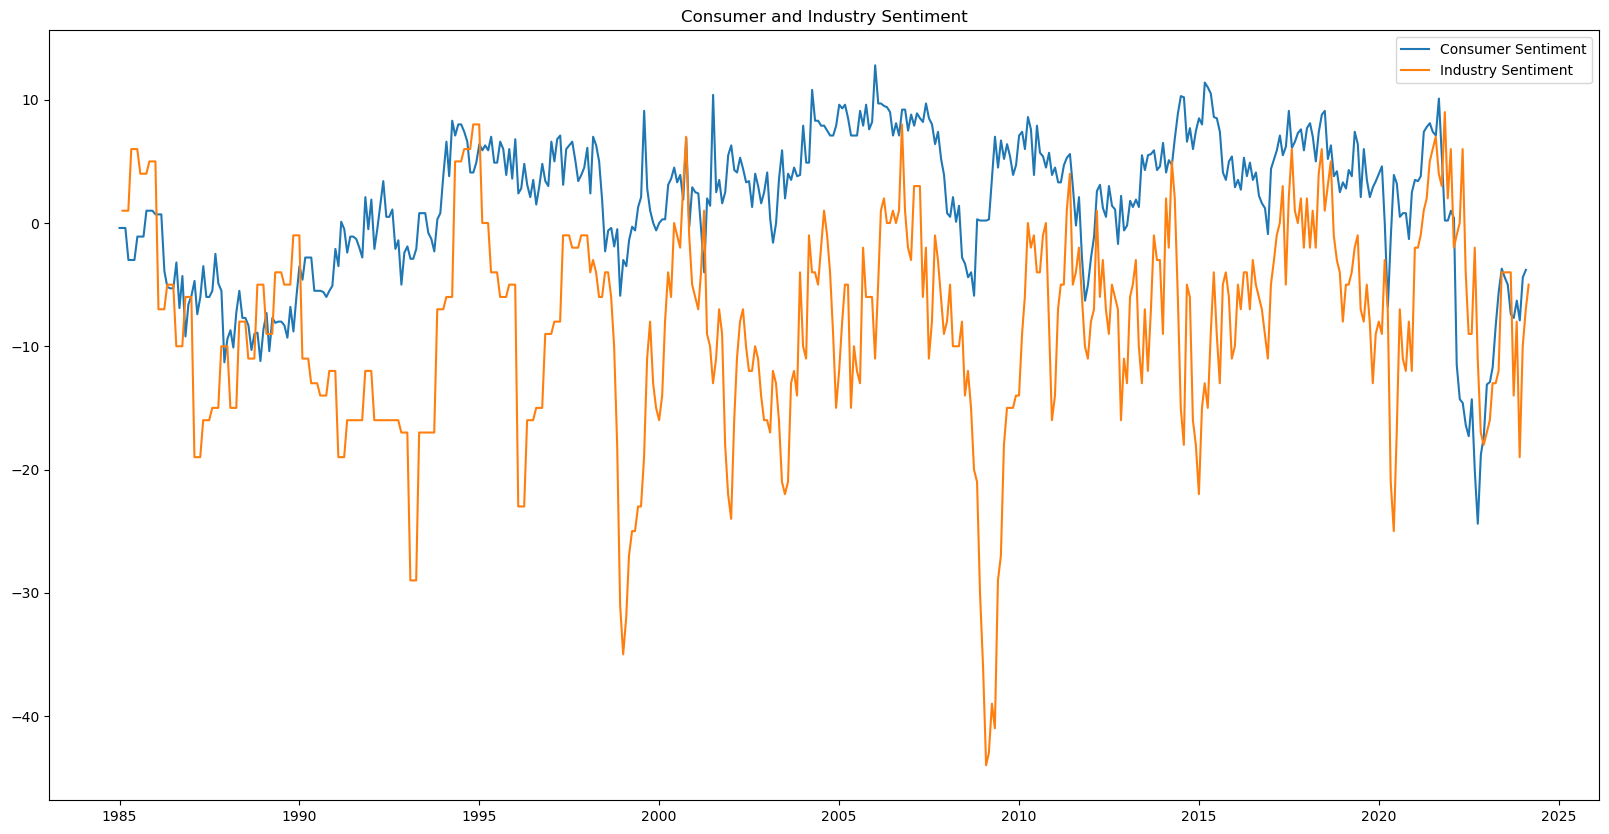

In [4]:
# Plotting the COF for cons and indu

## Consumer COF is calculated as (Q1 + Q2 + Q4 + Q9) / 4
## Industry COF is calculated as (Q2 - Q4 + Q5) / 3
plt.figure(figsize=(20,10))
plt.plot(cons_cof['Date'], cons_cof['COF'], label='Consumer Sentiment')
plt.plot(indu_cof['Date'], indu_cof['COF'], label='Industry Sentiment')
plt.title('Consumer and Industry Sentiment')
plt.legend()
plt.show()

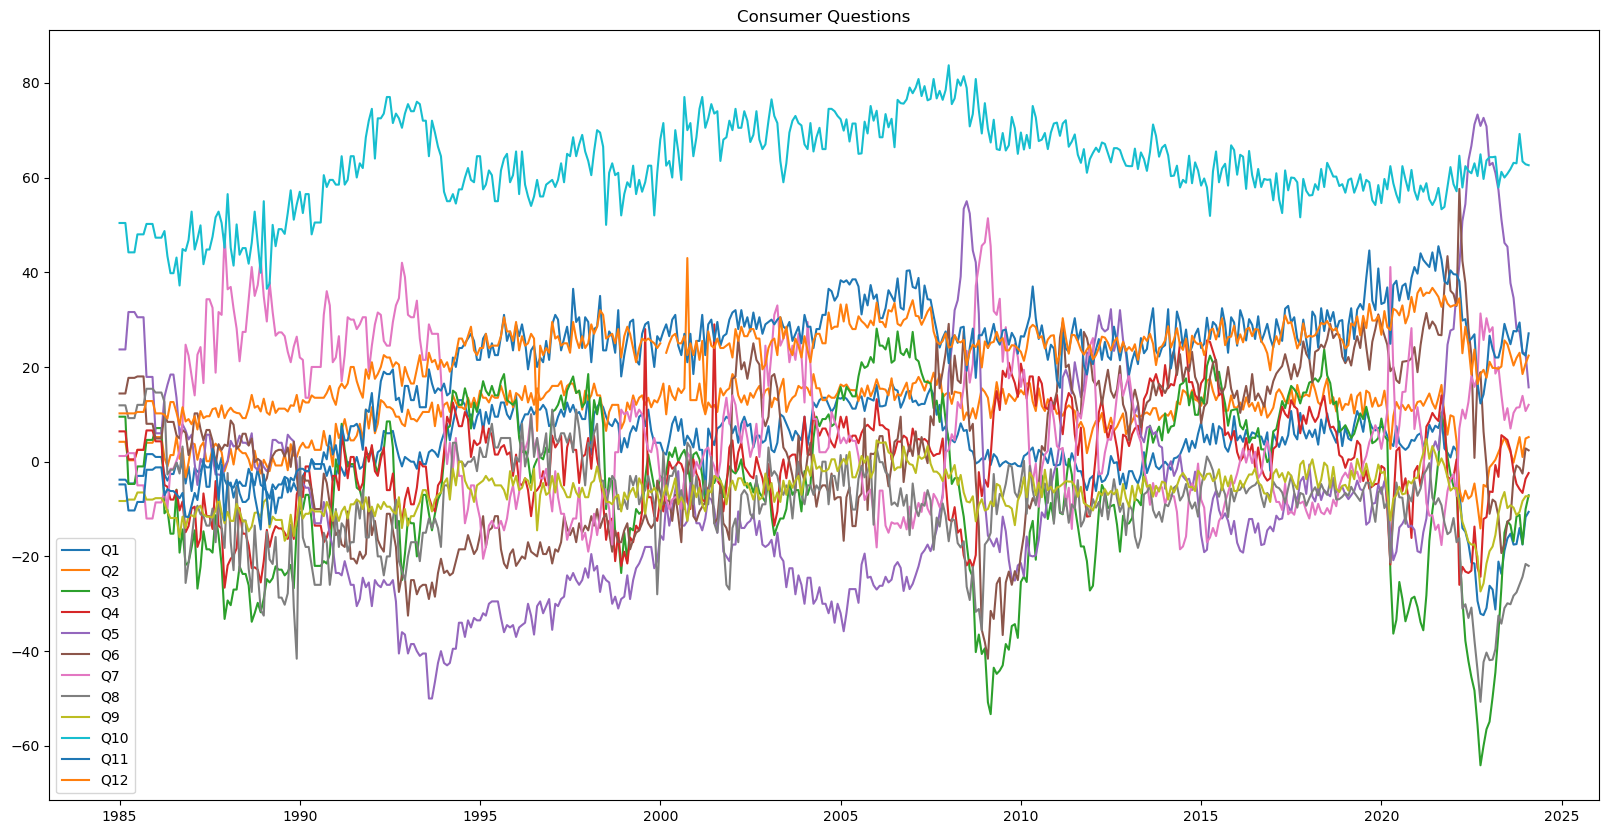

In [5]:
#Plotting the full range of questions for cons
plt.figure(figsize=(20,10))
plt.plot(cons_q['Date'], cons_q['Q1'], label='Q1')
plt.plot(cons_q['Date'], cons_q['Q2'], label='Q2')
plt.plot(cons_q['Date'], cons_q['Q3'], label='Q3')
plt.plot(cons_q['Date'], cons_q['Q4'], label='Q4')
plt.plot(cons_q['Date'], cons_q['Q5'], label='Q5')
plt.plot(cons_q['Date'], cons_q['Q6'], label='Q6')
plt.plot(cons_q['Date'], cons_q['Q7'], label='Q7')
plt.plot(cons_q['Date'], cons_q['Q8'], label='Q8')
plt.plot(cons_q['Date'], cons_q['Q9'], label='Q9')
plt.plot(cons_q['Date'], cons_q['Q10'], label='Q10')
plt.plot(cons_q['Date'], cons_q['Q11'], label='Q11')
plt.plot(cons_q['Date'], cons_q['Q12'], label='Q12')
plt.legend()
plt.title('Consumer Questions')
plt.show()

#Q1: How has the financial situation of your household changed over the last 12 months? It has...
#Q2: How do you expect the financial position of your household to change over the next 12 months? It will...
#Q3: How do you think the general economic situation in the country has changed over the past 12 months? It has...
#Q4: How do you expect the general economic situation in this country to develop over the next 12 months? It will...
#Q5: How do you think that consumer prices have developed over the last 12 months? They have…
#Q6: By comparison with the past 12 months, how do you expect that consumer prices will develop in the next 12 months? They will…
#Q7: How do you expect the number of people unemployed in this country to change over the next 12 months? The number will...
#Q8: In view of the general economic situation, do you think that now it is the right moment for people to make major purchases such as furniture, electrical/electronic devices, etc.?
#Q9: Compared to the past 12 months, do you expect to spend more or less money on major purchases (furniture, electrical/electronic devices, etc.) over the next 12 months? I will spend…
#Q10: In view of the general economic situation, do you think that now is...?
#Q11: Over the next 12 months, how likely is it that you save any money? 
#Q12: Which of these statements best describes the current financial situation of your household?


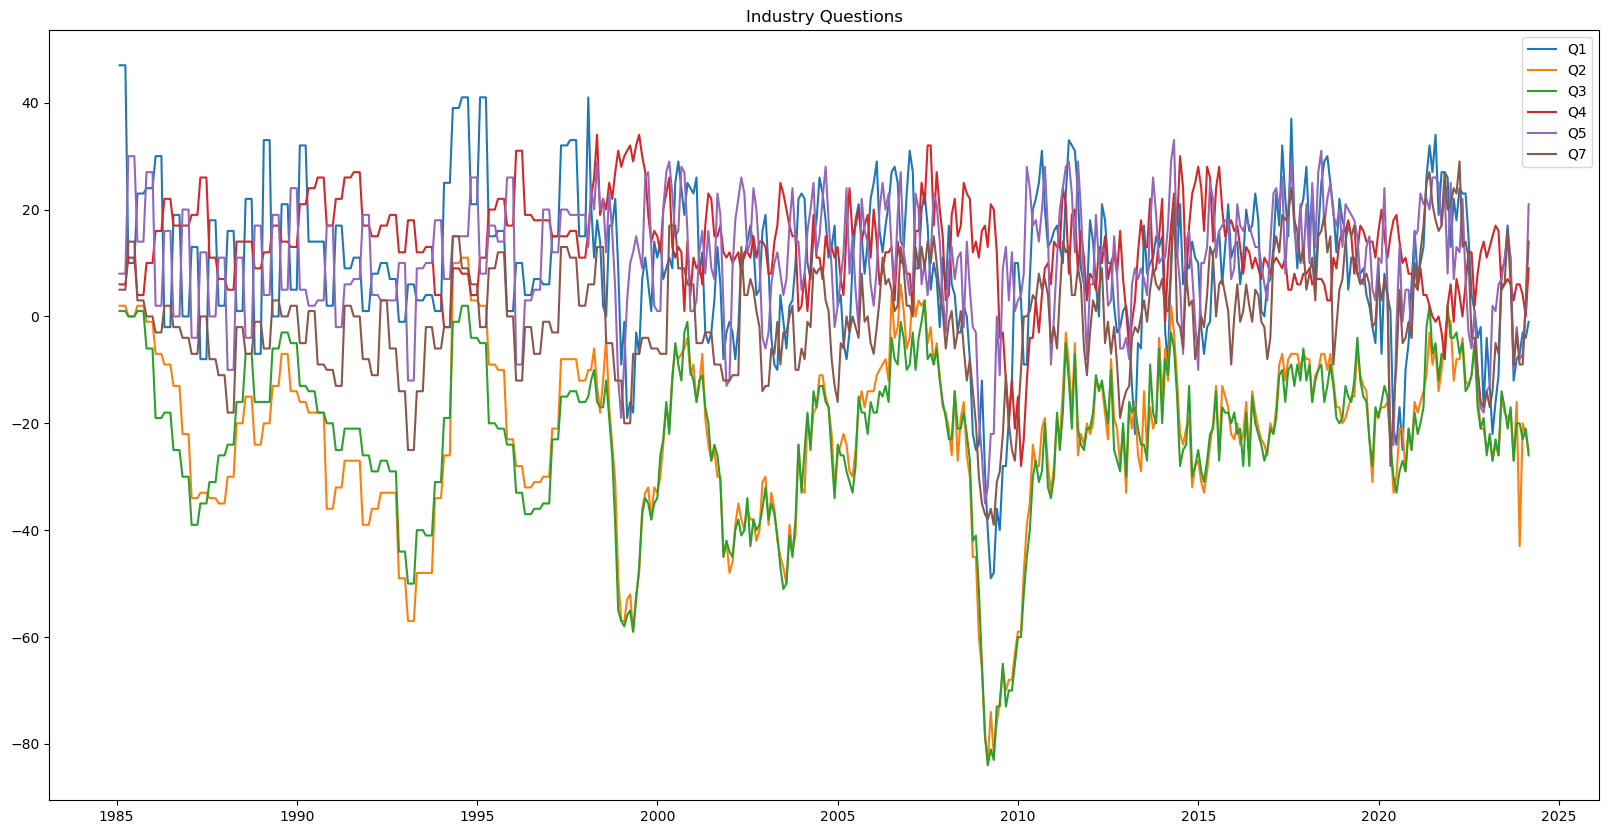

In [6]:
#Plotting the full range of questions for indu
plt.figure(figsize=(20,10))
plt.plot(indu_q['Date'], indu_q['Q1'], label='Q1')
plt.plot(indu_q['Date'], indu_q['Q2'], label='Q2')
plt.plot(indu_q['Date'], indu_q['Q3'], label='Q3')
plt.plot(indu_q['Date'], indu_q['Q4'], label='Q4')
plt.plot(indu_q['Date'], indu_q['Q5'], label='Q5')
plt.plot(indu_q['Date'], indu_q['Q7'], label='Q7')
plt.legend()
plt.title('Industry Questions')
plt.show()

#Q1: How has your production developed over the past 3 months? It has...
#Q2: Do you consider your current overall order books to be...?
#Q3: Do you consider your current export order books to be...?
#Q4: Do you consider your current stock of finished products to be...?
#Q5: How do you expect your production to develop over the next 3 months? It will...
#Q7: How do you expect your firm’s total employment to change over the next 3 months? It will...

In [7]:
# Selecting relevant columns for the GDP data
gdp = gdp[[2,3]]

#Naming the columns
gdp.columns = ['Quarter', 'GDP']

#Converting the Date to datetime. The current format is 'YYYYQX'
from datetime import datetime
def convert_to_datetime(date_str):
    # Split the string into year and quarter
    year, quarter = date_str[:4], date_str[-1]

    # Determine the month based on the quarter
    if quarter == "1":
        month = 1
    elif quarter == "2":
        month = 4
    elif quarter == "3":
        month = 7
    elif quarter == "4":
        month = 10
    else:
        raise ValueError("Invalid quarter")

    # Create a datetime object
    return datetime(int(year), month, 1)

# Apply the conversion function to the 'Date' column
gdp['Date'] = gdp['Quarter'].apply(lambda x: convert_to_datetime(x))


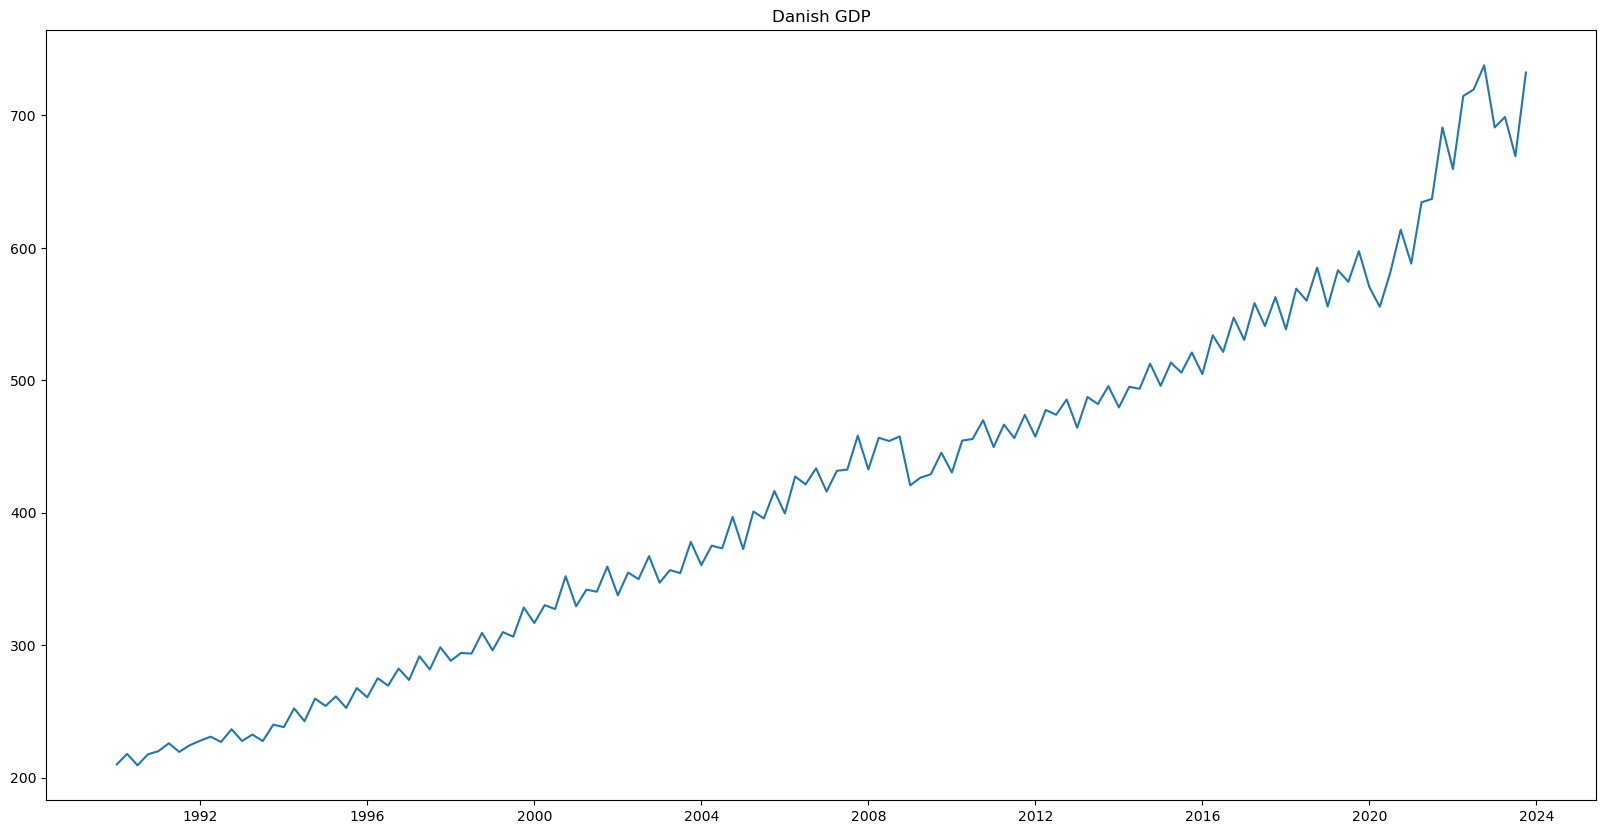

In [8]:
#Plotting the GDP data
plt.figure(figsize=(20,10))
plt.plot(gdp['Date'], gdp['GDP'])
plt.show()

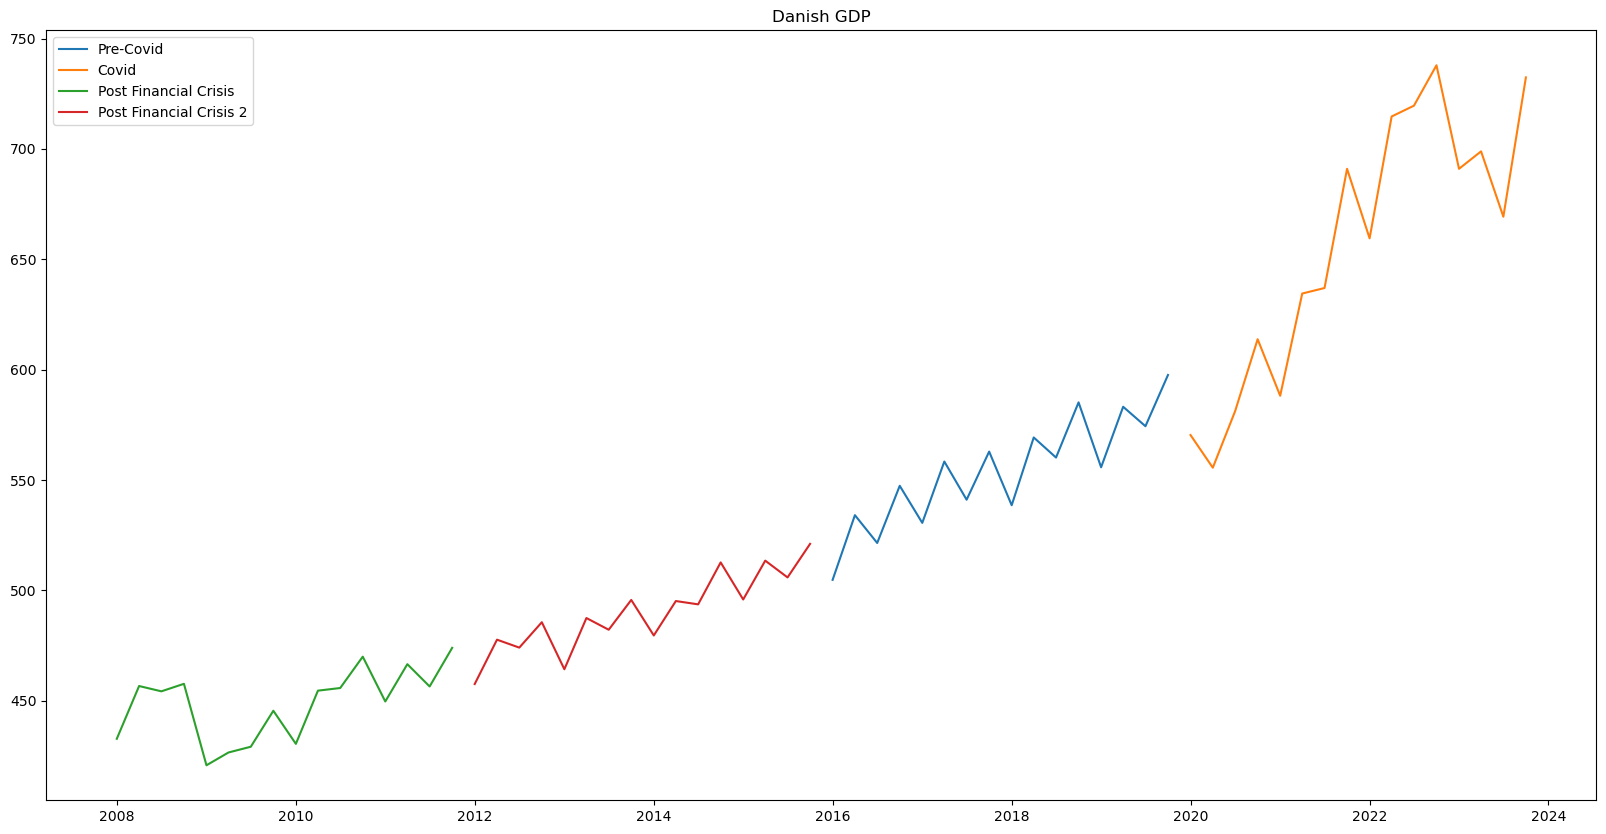

In [9]:
#Splitting the data 4 years before and after Covid
gdp_precovid = gdp[(gdp['Date'] >= '2016-01-01') & (gdp['Date'] < '2020-01-01')]
gdp_covid = gdp[gdp['Date'] >= '2020-01-01']

#Making a extra example 4 years after the financial crisis and four year after that again
gdp_postfc = gdp[(gdp['Date'] >= '2008-01-01') & (gdp['Date'] < '2012-01-01')]
gdp_postfc2 = gdp[(gdp['Date'] >= '2012-01-01') & (gdp['Date'] < '2016-01-01')]


#Plotting the new GDP data
plt.figure(figsize=(20,10))
plt.plot(gdp_precovid['Date'], gdp_precovid['GDP'], label='Pre-Covid')
plt.plot(gdp_covid['Date'], gdp_covid['GDP'], label='Covid')
plt.plot(gdp_postfc['Date'], gdp_postfc['GDP'], label='Post Financial Crisis')
plt.plot(gdp_postfc2['Date'], gdp_postfc2['GDP'], label='Post Financial Crisis 2')
plt.title('Danish GDP')
plt.legend()
plt.show()

In [10]:
#Calculating the variance in GDP pre and post Covid plus post financial crisis
variance_precovid = gdp_precovid['GDP'].var()
variance_covid = gdp_covid['GDP'].var()
variance_postfc = gdp_postfc['GDP'].var()
variance_postfc2 = gdp_postfc2['GDP'].var()

print(f"Variance in GDP pre-Covid: {variance_precovid}")
print(f"Variance in GDP post-Covid: {variance_covid}")
print(f"Variance in GDP post-Financial Crisis: {variance_postfc}")
print(f"Variance in GDP post-Financial Crisis 2: {variance_postfc2}")

#The variance in GDP is lowest in the period post financial crisis. Then post financial crisis 2, pre-covid and highest in the period post-covid. This suggest the economy has become more volatile over time.

Variance in GDP pre-Covid: 625.6702916666668
Variance in GDP post-Covid: 3647.8798333333334
Variance in GDP post-Financial Crisis: 265.2462916666666
Variance in GDP post-Financial Crisis 2: 313.61462499999993


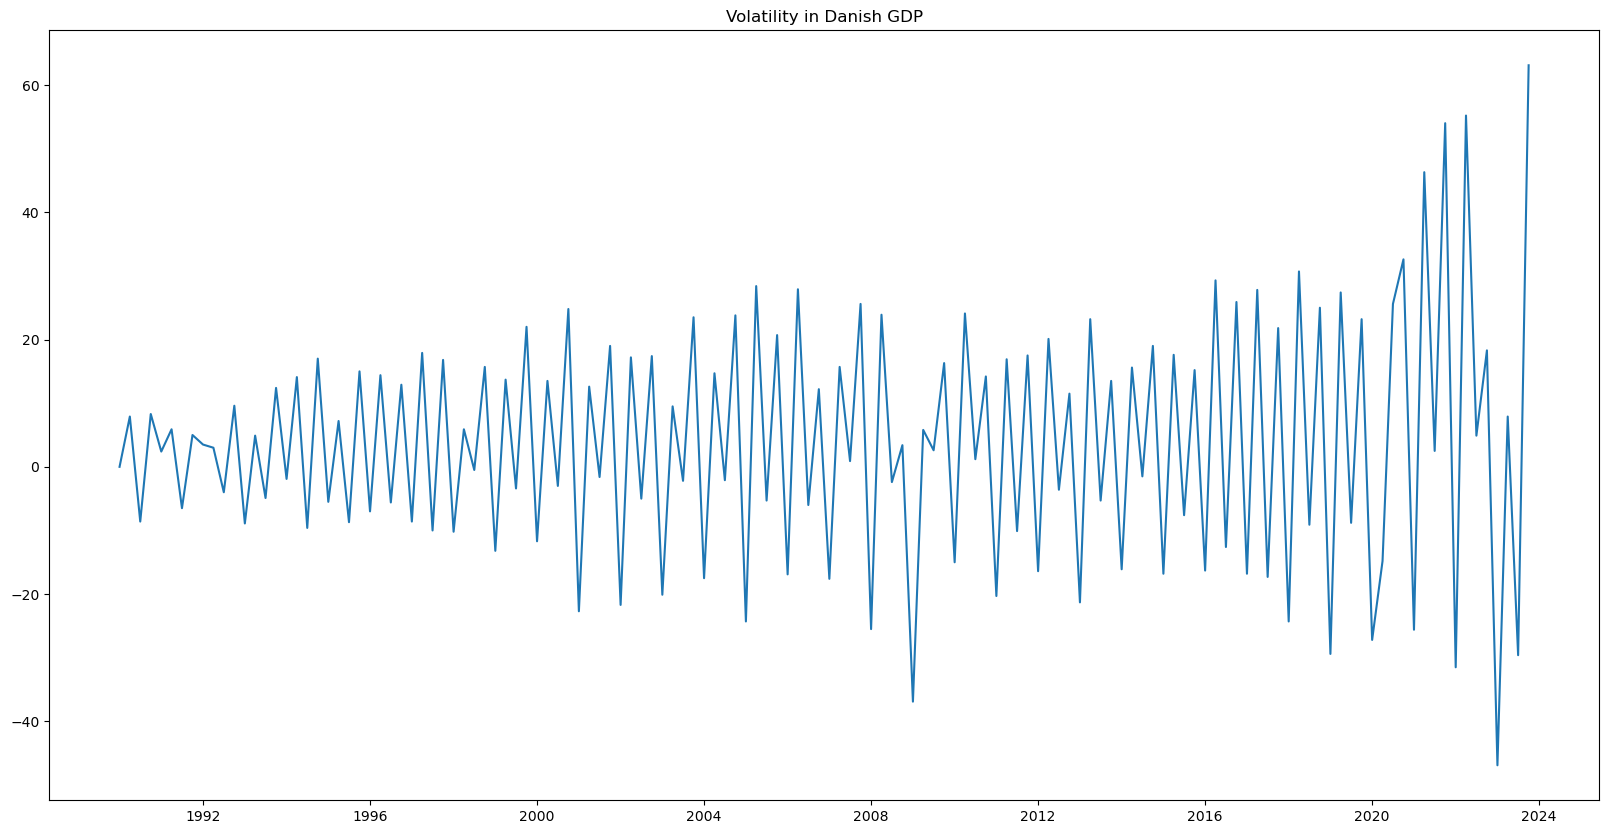

In [11]:
#Calculating the volatility over time in the GDP data
gdp['GDP_diff'] = gdp['GDP'].diff()
gdp['GDP_diff'] = gdp['GDP_diff'].fillna(0)

#Plotting the volatility in the GDP data
plt.figure(figsize=(20,10))
plt.plot(gdp['Date'], gdp['GDP_diff'])
plt.title('Volatility in Danish GDP')
plt.show()

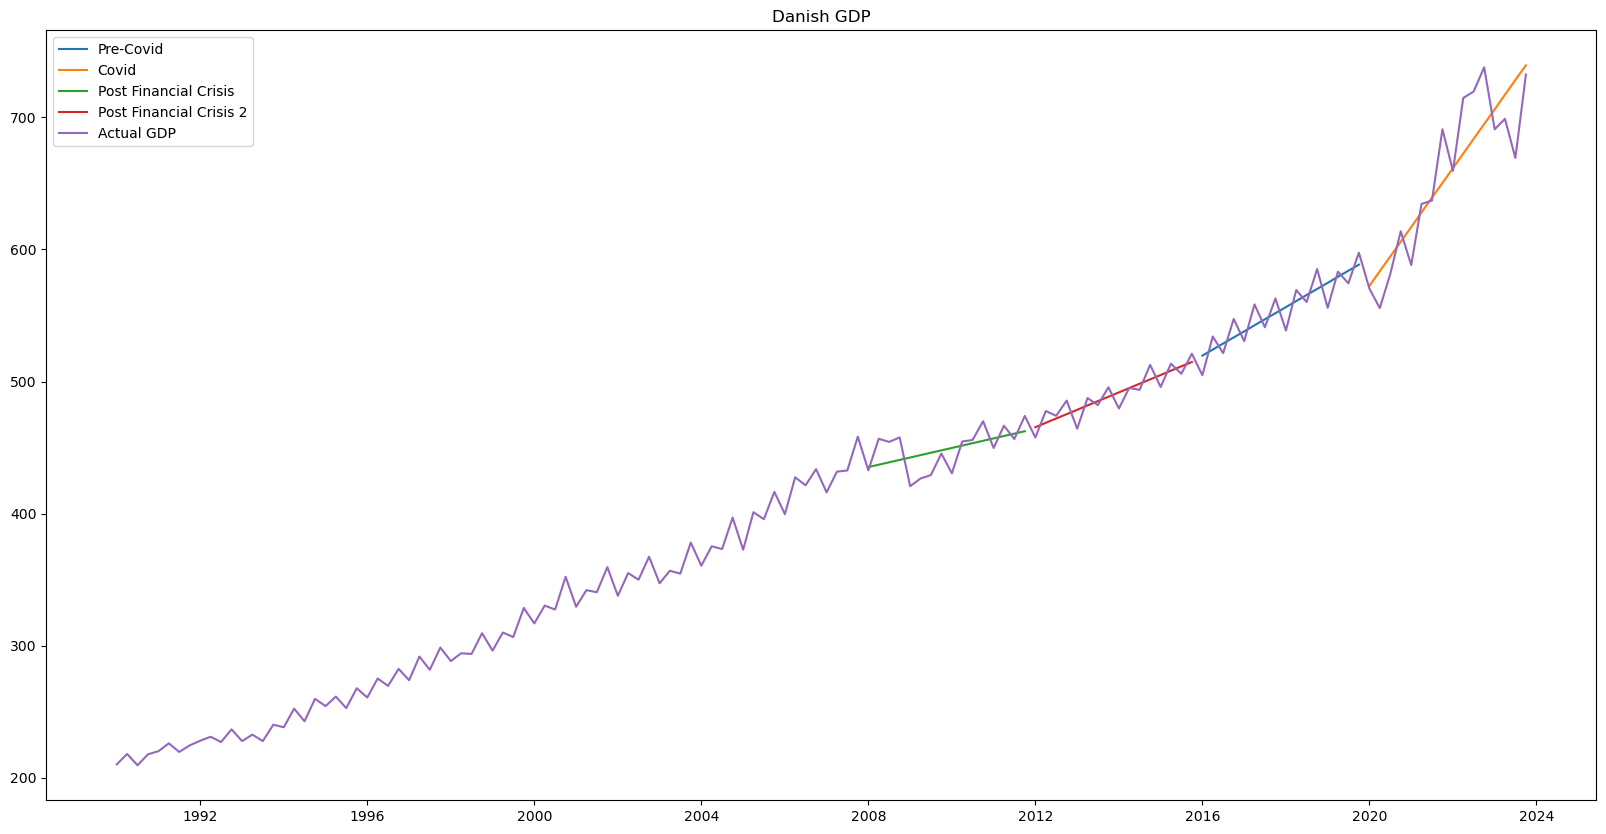

Slope Pre-Covid: 4.590735294117648
Slope Covid: 11.136176470588234
Slope Post Financial Crisis: 1.8092647058823537
Slope Post Financial Crisis 2: 3.291029411764705


In [12]:
#Applying a linear regression to each of the periods
from sklearn.linear_model import LinearRegression

#Pre-Covid
X_precovid = np.arange(len(gdp_precovid)).reshape(-1, 1)
y_precovid = gdp_precovid['GDP']

model_precovid = LinearRegression()
model_precovid.fit(X_precovid, y_precovid)

#Covid
X_covid = np.arange(len(gdp_covid)).reshape(-1, 1)
y_covid = gdp_covid['GDP']

model_covid = LinearRegression()
model_covid.fit(X_covid, y_covid)

#Post Financial Crisis
X_postfc = np.arange(len(gdp_postfc)).reshape(-1, 1)
y_postfc = gdp_postfc['GDP']

model_postfc = LinearRegression()
model_postfc.fit(X_postfc, y_postfc)

#Post Financial Crisis 2
X_postfc2 = np.arange(len(gdp_postfc2)).reshape(-1, 1)
y_postfc2 = gdp_postfc2['GDP']

model_postfc2 = LinearRegression()
model_postfc2.fit(X_postfc2, y_postfc2)

#Plotting the linear regression models
plt.figure(figsize=(20,10))
plt.plot(gdp_precovid['Date'], model_precovid.predict(X_precovid), label='Pre-Covid')
plt.plot(gdp_covid['Date'], model_covid.predict(X_covid), label='Covid')
plt.plot(gdp_postfc['Date'], model_postfc.predict(X_postfc), label='Post Financial Crisis')
plt.plot(gdp_postfc2['Date'], model_postfc2.predict(X_postfc2), label='Post Financial Crisis 2')
plt.plot(gdp['Date'], gdp['GDP'], label='Actual GDP')
plt.title('Danish GDP')
plt.legend()
plt.show()

#Printing the slopes of the linear regression models
print(f"Slope Pre-Covid: {model_precovid.coef_[0]}")
print(f"Slope Covid: {model_covid.coef_[0]}")
print(f"Slope Post Financial Crisis: {model_postfc.coef_[0]}")
print(f"Slope Post Financial Crisis 2: {model_postfc2.coef_[0]}")

In [13]:
#Calculating the entropy of the GDP data
from scipy.stats import entropy

entropy_precovid = entropy(gdp_precovid['GDP'])
entropy_covid = entropy(gdp_covid['GDP'])
entropy_postfc = entropy(gdp_postfc['GDP'])
entropy_postfc2 = entropy(gdp_postfc2['GDP'])

entropy_full = entropy(gdp['GDP'])

print(f"Entropy Pre-Covid: {entropy_precovid}")
print(f"Entropy Covid: {entropy_covid}")
print(f"Entropy Post Financial Crisis: {entropy_postfc}")
print(f"Entropy Post Financial Crisis 2: {entropy_postfc2}")
print(f"Entropy Full: {entropy_full}")

#The Shannon entropy is 2.77 pre-covid. Post-covid the entropy is a bit lower but still 2.77. 

Entropy Pre-Covid: 2.7716307569083414
Entropy Covid: 2.768574383240165
Entropy Post Financial Crisis: 2.771969257888541
Entropy Post Financial Crisis 2: 2.771976406948556
Entropy Full: 4.858786302953472
